# Logging Metrics and Performance Charts of Advanced Models


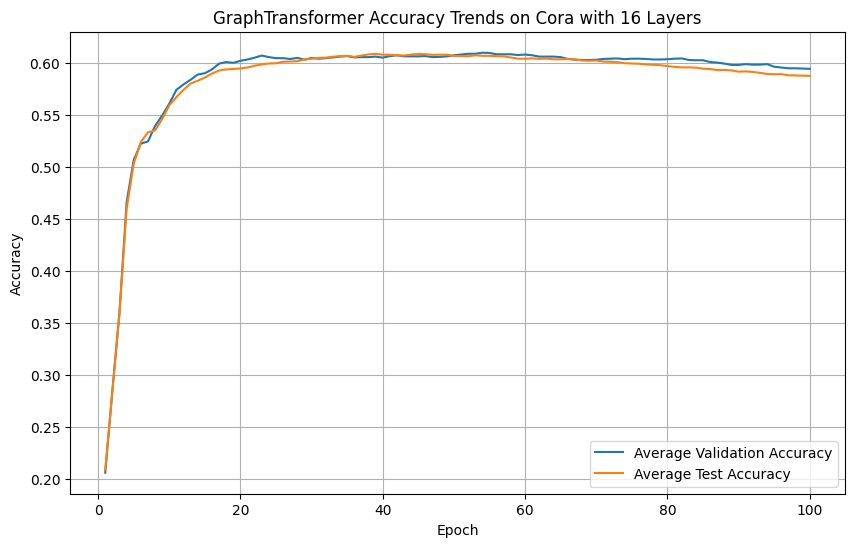

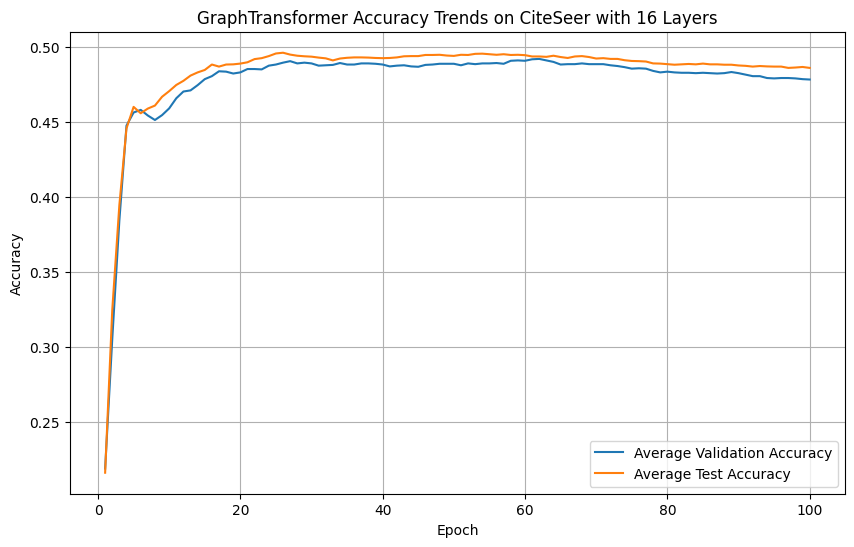

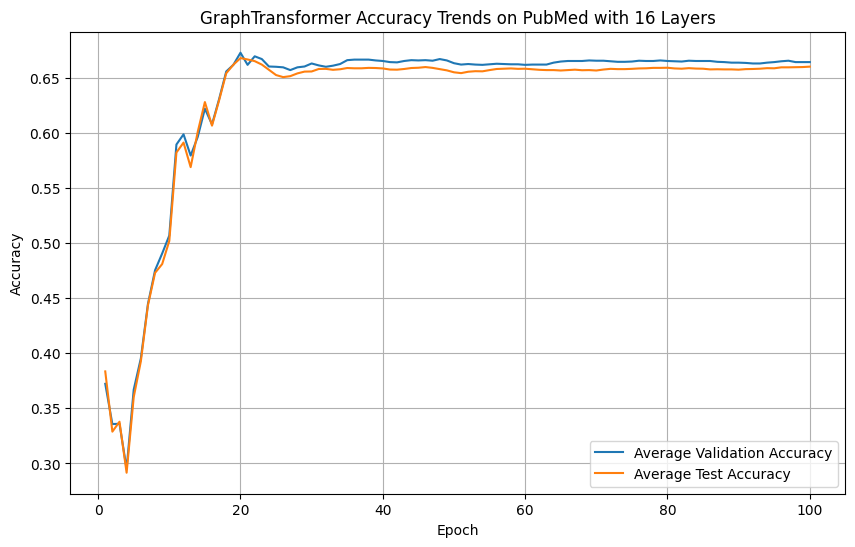

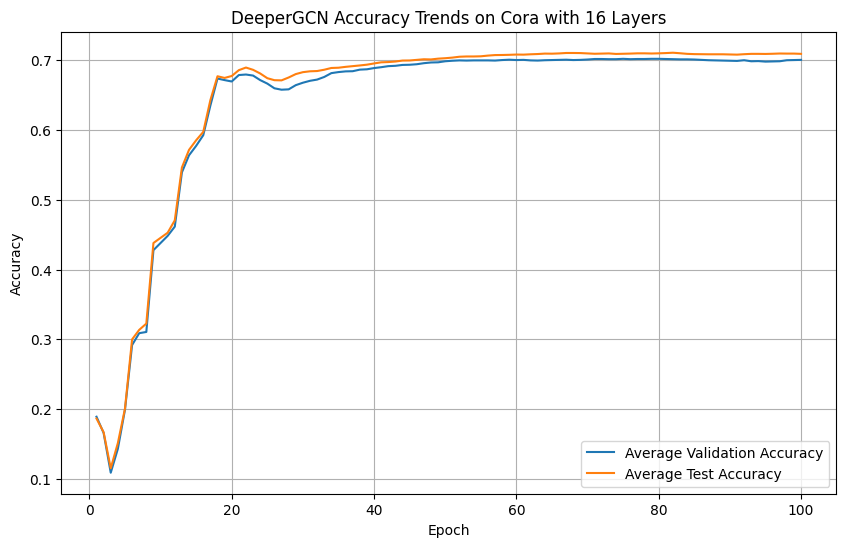

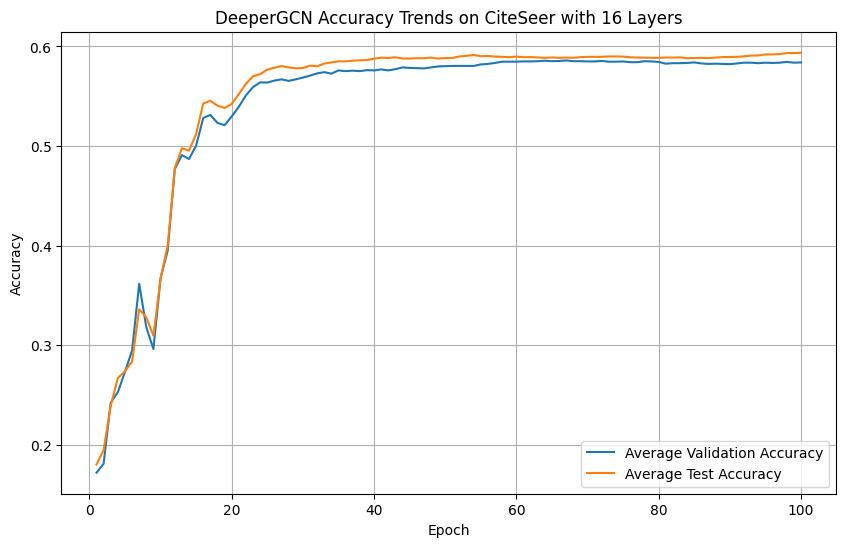

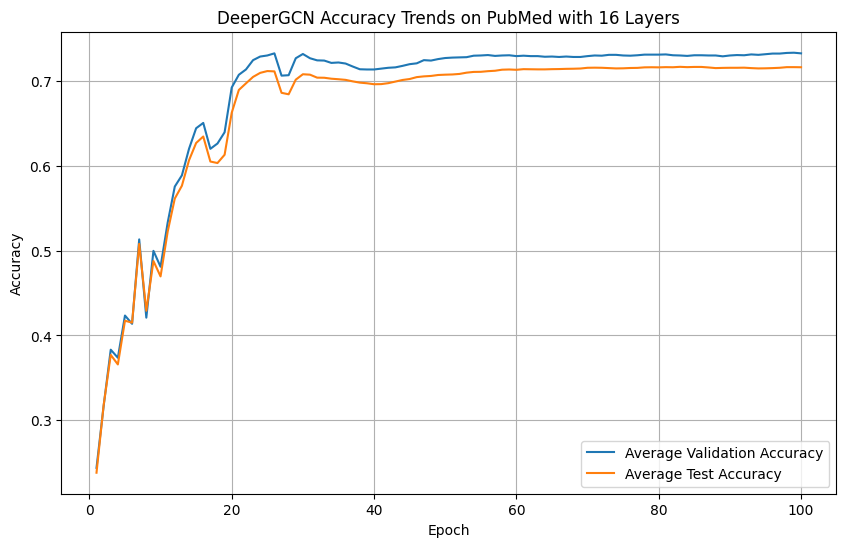

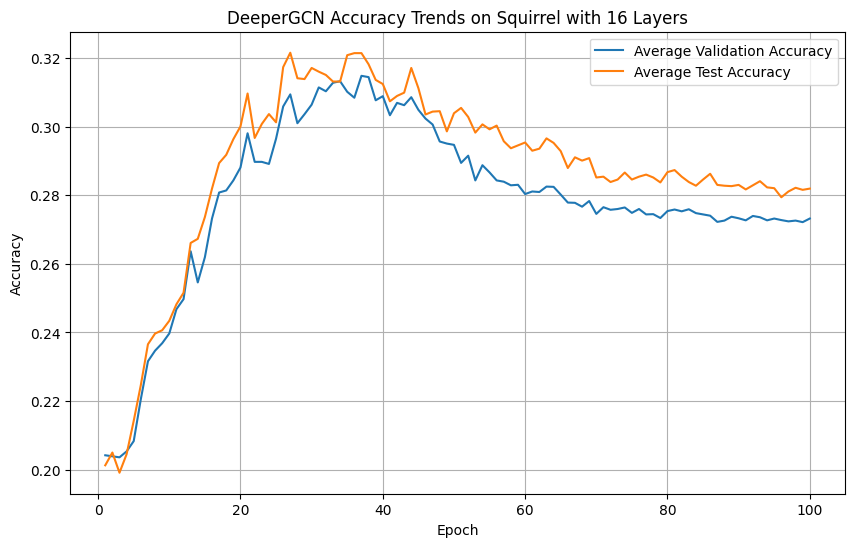

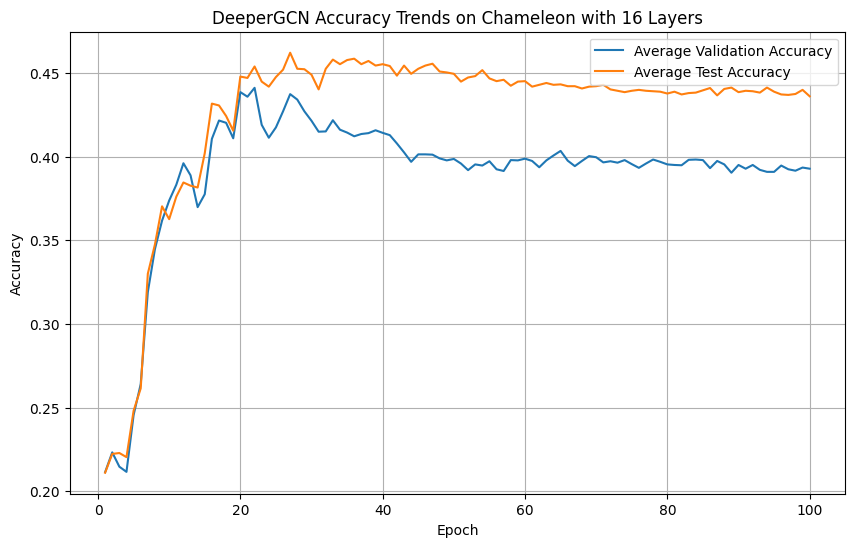

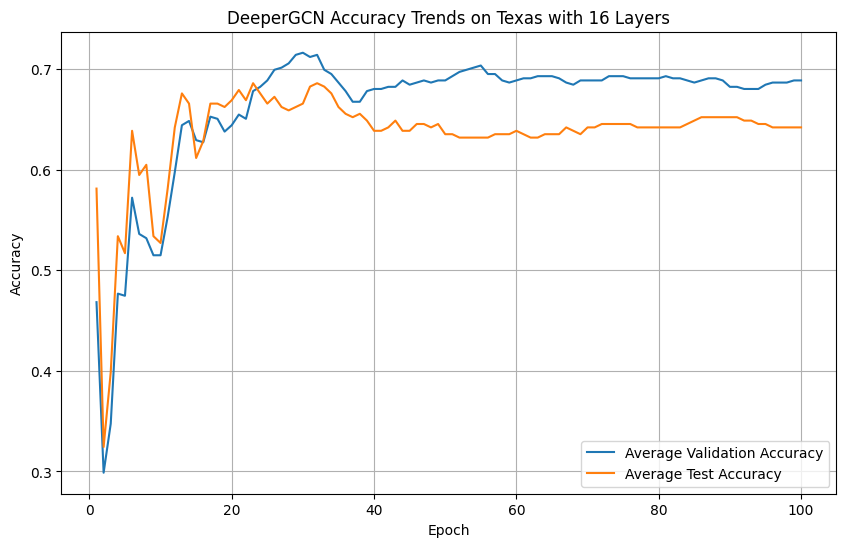

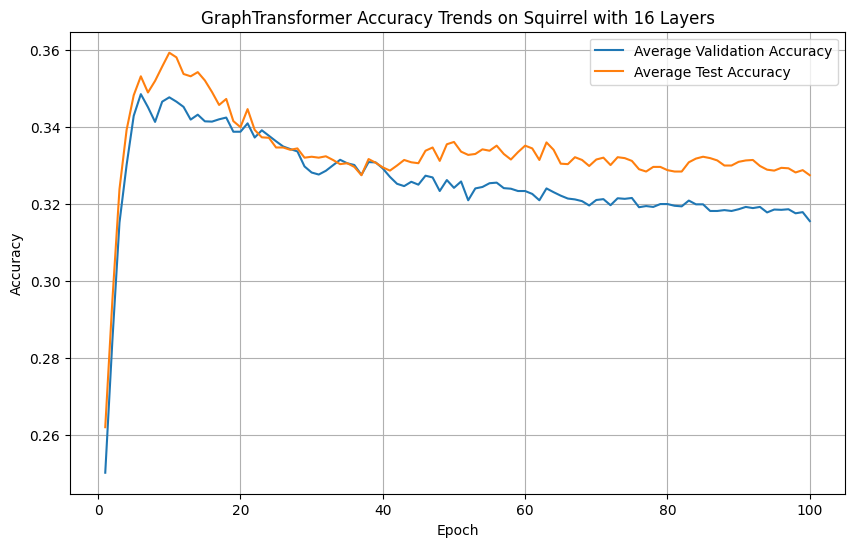

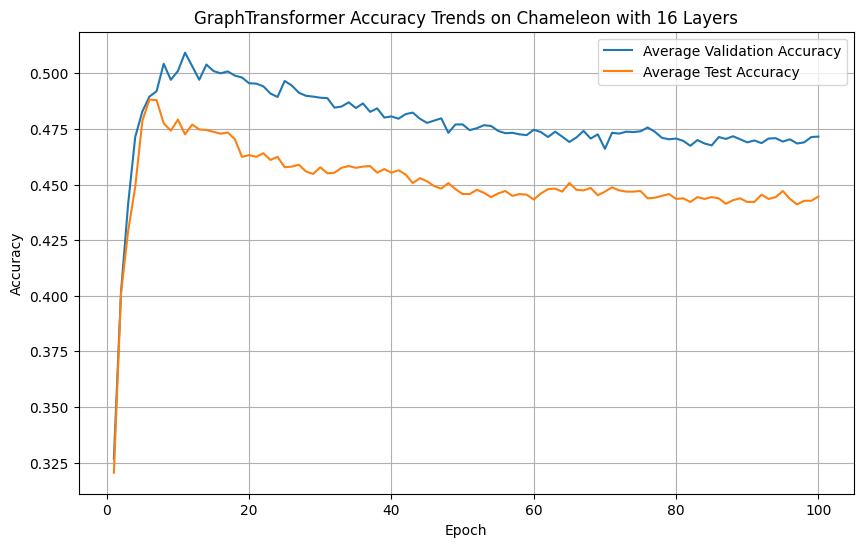

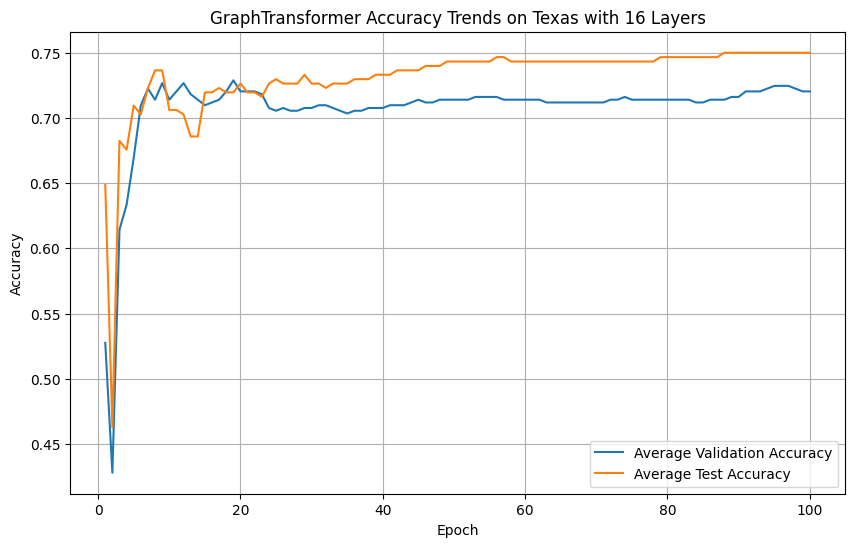

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os  # Import the os module

def plot_results(dataset_name, model_name, num_layers, hidden_dims):
    # Iterate over hidden dimensions to read all relevant files
    all_dfs = []
    for hidden_dim in hidden_dims:
        file_path = f"{dataset_name}_{model_name}_{num_layers}_layers_{hidden_dim}_hidden_results.csv"
        if os.path.exists(file_path):  # Check if the file exists
            df = pd.read_csv(file_path)
            all_dfs.append(df)
        else:
            print(f"Warning: File not found - {file_path}")

    if not all_dfs:  # If no files were found, return
        print(f"No data found for {dataset_name}, {model_name}, {num_layers} layers")
        return

    # Calculate average metrics across all hidden dimensions
    avg_val_acc = pd.concat([df["val_acc"] for df in all_dfs], axis=1).mean(axis=1)
    avg_test_acc = pd.concat([df["test_acc"] for df in all_dfs], axis=1).mean(axis=1)
    epochs = all_dfs[0]["epoch"]  # Assume all files have the same epochs

    # Plot average metrics
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, avg_val_acc, label="Average Validation Accuracy")
    plt.plot(epochs, avg_test_acc, label="Average Test Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title(f"{model_name} Accuracy Trends on {dataset_name} with {num_layers} Layers")
    plt.legend()
    plt.grid()
    plt.show()

# Example: Plot results for Cora dataset using DeeperGCN with 16 layers
hidden_dims = [8, 16, 24, 32, 40, 48, 56, 64]  # Use the same hidden dimensions
plot_results('Cora', 'GraphTransformer', 16, hidden_dims)
plot_results('CiteSeer', 'GraphTransformer', 16, hidden_dims)
plot_results('PubMed', 'GraphTransformer', 16, hidden_dims)


plot_results('Cora', 'DeeperGCN', 16, hidden_dims)
plot_results('CiteSeer', 'DeeperGCN', 16, hidden_dims)
plot_results('PubMed', 'DeeperGCN', 16, hidden_dims)


plot_results('Squirrel', 'DeeperGCN', 16, hidden_dims)
plot_results('Chameleon', 'DeeperGCN', 16, hidden_dims)
plot_results('Texas', 'DeeperGCN', 16, hidden_dims)


plot_results('Squirrel', 'GraphTransformer', 16, hidden_dims)
plot_results('Chameleon', 'GraphTransformer', 16, hidden_dims)
plot_results('Texas', 'GraphTransformer', 16, hidden_dims)

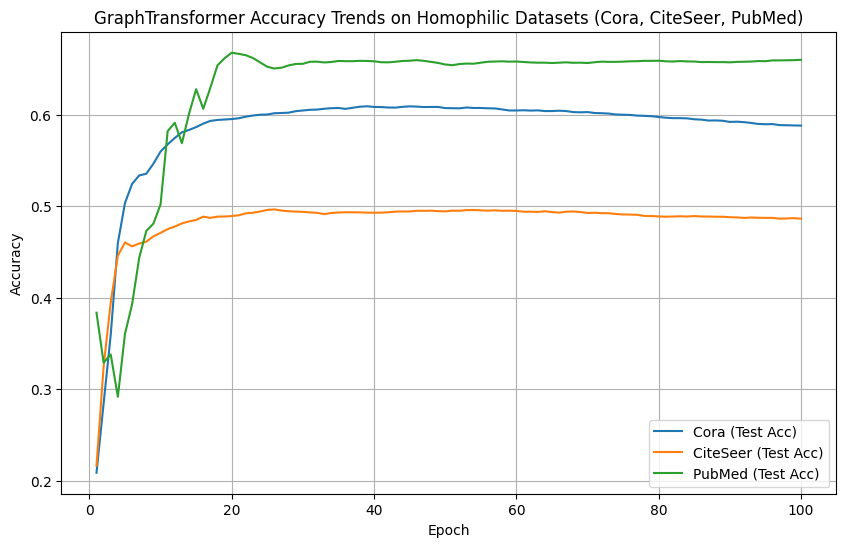

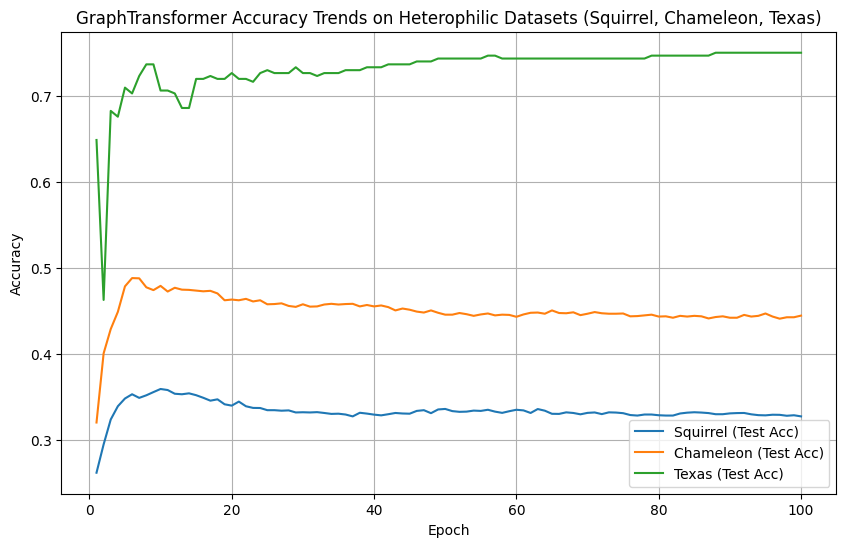

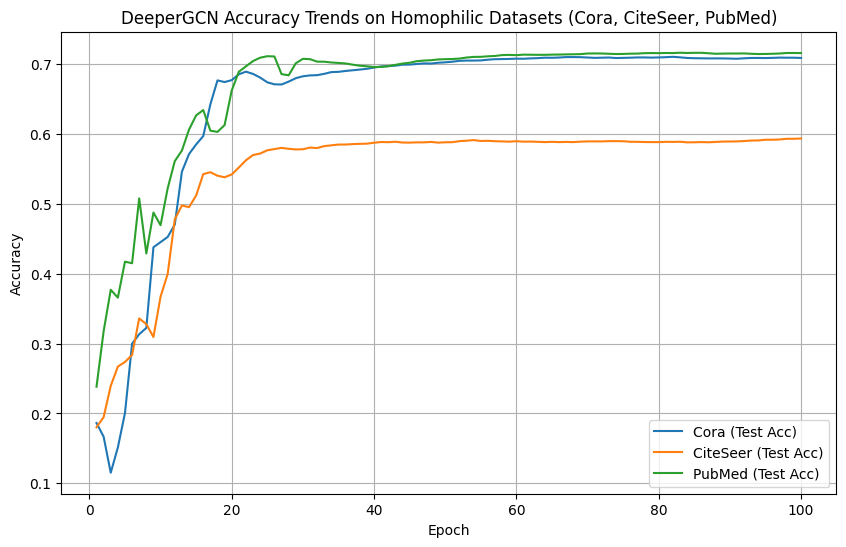

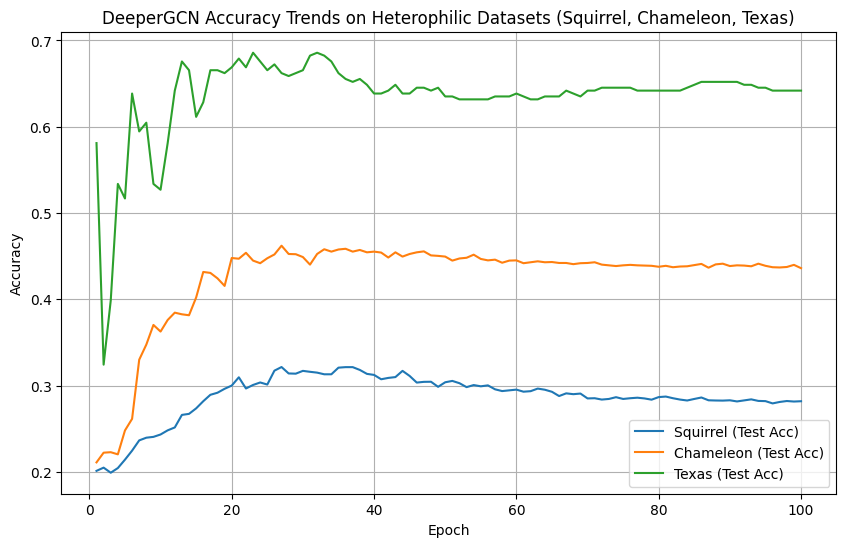

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def aggregate_results(dataset_name, model_name, num_layers, hidden_dims):
    """Aggregate results over multiple hidden_dims for a single dataset."""
    all_dfs = []
    for hidden_dim in hidden_dims:
        file_path = f"{dataset_name}_{model_name}_{num_layers}_layers_{hidden_dim}_hidden_results.csv"
        if os.path.exists(file_path):
            df = pd.read_csv(file_path)
            all_dfs.append(df)
        else:
            print(f"Warning: File not found - {file_path}")

    if not all_dfs:
        print(f"No data found for {dataset_name} with {model_name}, {num_layers} layers")
        return None, None, None

    # Calculate average metrics across all hidden dimensions
    avg_val_acc = pd.concat([df["val_acc"] for df in all_dfs], axis=1).mean(axis=1)
    avg_test_acc = pd.concat([df["test_acc"] for df in all_dfs], axis=1).mean(axis=1)
    epochs = all_dfs[0]["epoch"]  # Assume all files have the same epochs
    return epochs, avg_val_acc, avg_test_acc

def plot_results_across_datasets(model_name, num_layers, hidden_dims, datasets, plot_title):
    """Plot average validation and test accuracy across multiple datasets on a single figure."""
    plt.figure(figsize=(10, 6))

    for dataset in datasets:
        epochs, avg_val_acc, avg_test_acc = aggregate_results(dataset, model_name, num_layers, hidden_dims)
        if epochs is not None:
            # You can choose which metric to plot; here we plot test accuracy.
            plt.plot(epochs, avg_test_acc, label=f"{dataset} (Test Acc)")

    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title(f"{model_name} Accuracy Trends on {plot_title}")
    plt.legend()
    plt.grid()
    plt.show()

# Define datasets
homophilic_datasets = ["Cora", "CiteSeer", "PubMed"]
heterophilic_datasets = ["Squirrel", "Chameleon", "Texas"]

# Define hidden dimensions
hidden_dims = [8, 16, 24, 32, 40, 48, 56, 64]

# Plot for GraphTransformer
plot_results_across_datasets("GraphTransformer", 16, hidden_dims, homophilic_datasets, "Homophilic Datasets (Cora, CiteSeer, PubMed)")
plot_results_across_datasets("GraphTransformer", 16, hidden_dims, heterophilic_datasets, "Heterophilic Datasets (Squirrel, Chameleon, Texas)")

# Plot for DeeperGCN
plot_results_across_datasets("DeeperGCN", 16, hidden_dims, homophilic_datasets, "Homophilic Datasets (Cora, CiteSeer, PubMed)")
plot_results_across_datasets("DeeperGCN", 16, hidden_dims, heterophilic_datasets, "Heterophilic Datasets (Squirrel, Chameleon, Texas)")


# Visualize Training Metrics

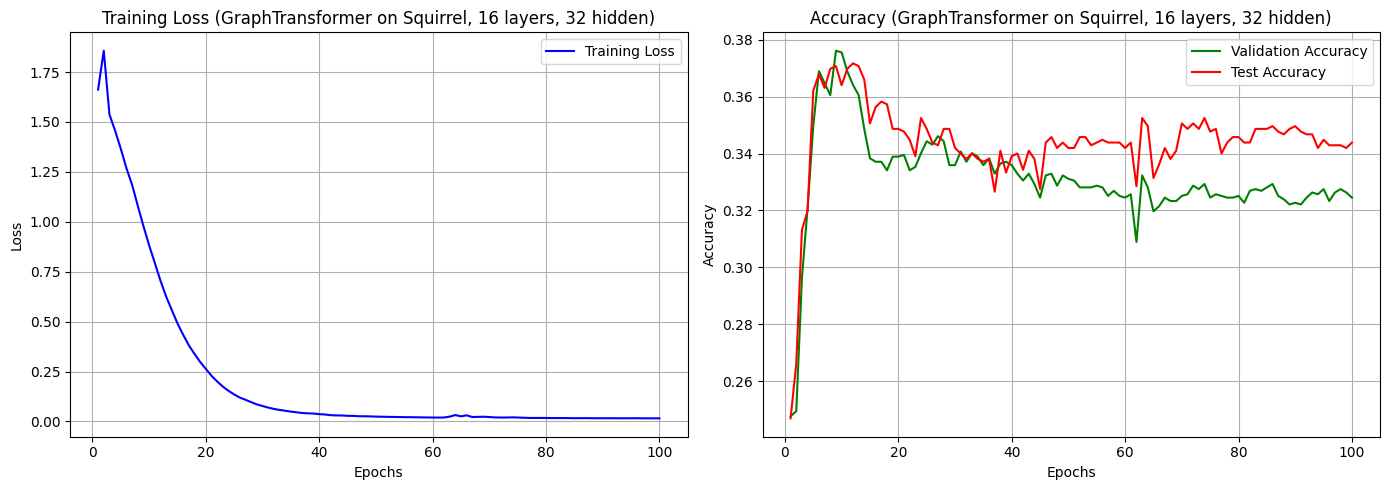

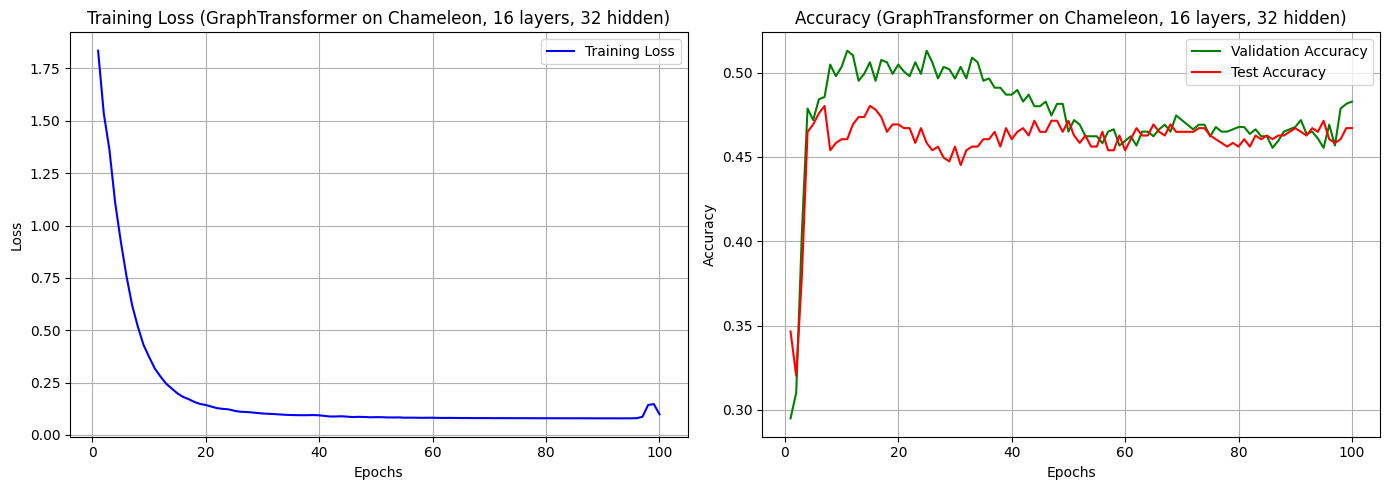

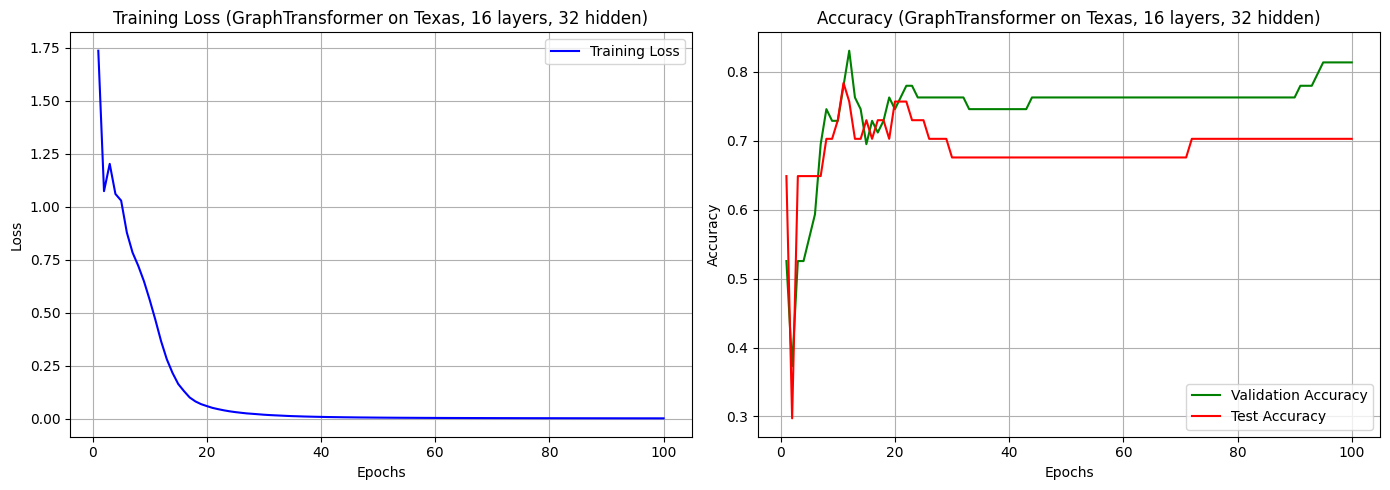

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def plot_metrics(dataset_name, model_name, num_layers, hidden_dim):
    """
    Plots the training loss, validation accuracy, and test accuracy for a specific model and dataset.

    Parameters:
    - dataset_name (str): Name of the dataset (e.g., 'Squirrel', 'Chameleon', 'Texas').
    - model_name (str): Name of the model (e.g., 'GraphTransformer').
    - num_layers (int): Number of layers in the model.
    - hidden_dim (int): Number of hidden units in the model.
    """
    # Construct the filename based on the assumed structure
    filename = f"{dataset_name}_{model_name}_{num_layers}_layers_{hidden_dim}_hidden_results.csv"
    file_path = os.path.join('.', filename)  # Replace '.' with your specific directory if needed

    try:
        df = pd.read_csv(file_path)
    except FileNotFoundError:
        print(f"File {file_path} not found.")
        return

    epochs = df['epoch']
    train_loss = df['train_loss']
    val_acc = df['val_acc']
    test_acc = df['test_acc']

    plt.figure(figsize=(14, 5))

    # Plot training loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_loss, label='Training Loss', color='blue')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Training Loss ({model_name} on {dataset_name}, {num_layers} layers, {hidden_dim} hidden)')
    plt.legend()
    plt.grid(True)

    # Plot validation and test accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, val_acc, label='Validation Accuracy', color='green')
    plt.plot(epochs, test_acc, label='Test Accuracy', color='red')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'Accuracy ({model_name} on {dataset_name}, {num_layers} layers, {hidden_dim} hidden)')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Example usage:
plot_metrics('Squirrel', 'GraphTransformer', 16,32)
plot_metrics('Chameleon', 'GraphTransformer', 16,32)
plot_metrics('Texas', 'GraphTransformer', 16,32)